### Required Libraries

In [1]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
import mediapipe as mp
import matplotlib.pyplot as plt
import cv2 
from Preprocessing_Utility_Functions import *

import joblib

load models

In [2]:
votingModelroll=joblib.load(r'C:\Users\mohamed elsayed\Desktop\projects\Pose Estimation\saved mdoel\roll_model.joblib')
votingModelpitch=joblib.load(r'C:\Users\mohamed elsayed\Desktop\projects\Pose Estimation\saved model\pitch_model.joblib')
votingModelyaw=joblib.load(r'C:\Users\mohamed elsayed\Desktop\projects\Pose Estimation\saved model\yaw_model.joblib')
pca=joblib.load(r'C:\Users\mohamed elsayed\Desktop\projects\Pose Estimation\saved model\pca_model.joblib')

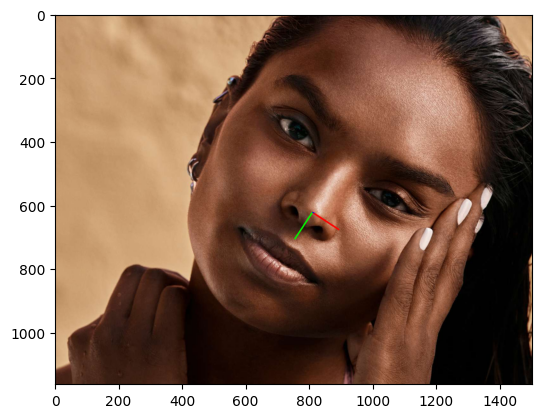

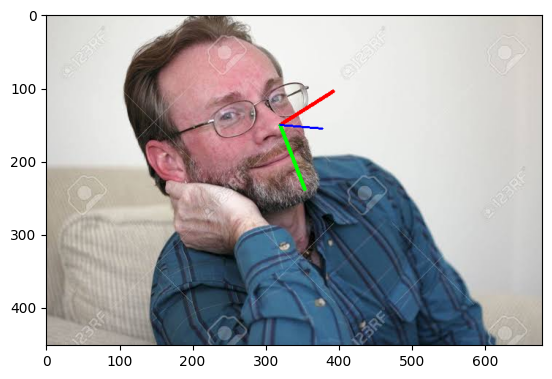

In [7]:
directory_path = r'C:\Users\mohamed elsayed\Desktop\projects\Pose Estimation\test img'

# Iterate through all JPG files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.jpg'):
        # Construct the full path to the image
        image_path = os.path.join(directory_path, filename)
        
        # Read the image
        image = cv2.imread(image_path)
        
        # Predict orientation and draw axes on the image
        roll, pitch, yaw, nose = predict_on_image(image, votingModelroll, votingModelpitch, votingModelyaw, pca)
        
        # Display the image with axes
        if roll is not None and pitch is not None and yaw is not None and nose is not None:
            image_with_axes = draw_axis(image, pitch[0], yaw[0], roll[0], tdx=int(nose.x * image.shape[1]), tdy=int(nose.y * image.shape[0]))
            plt.imshow(cv2.cvtColor(image_with_axes, cv2.COLOR_BGR2RGB))
            plt.pause(0.1)  # Pause for a short time to allow the plot to be updated

# Close the plot window at the end
plt.show()

In [5]:
video_path = r"C:\Users\mohamed elsayed\Desktop\test.mp4"
output_path = r'C:\Users\mohamed elsayed\Desktop\test2.mp4'

In [6]:
predict_on_video(video_path, output_path, votingModelroll, votingModelpitch, votingModelyaw, pca)

MoviePy - Writing audio in saved_audio.wav


MoviePy - Done.
Moviepy - Building video C:\Users\mohamed elsayed\Desktop\output_with_audio.mp4.
MoviePy - Writing audio in output_with_audioTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video C:\Users\mohamed elsayed\Desktop\output_with_audio.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\mohamed elsayed\Desktop\output_with_audio.mp4
